#### Desenvolvido por Mauricio Haruo Matsumura
#### mhmatsumura@yahoo.com.br

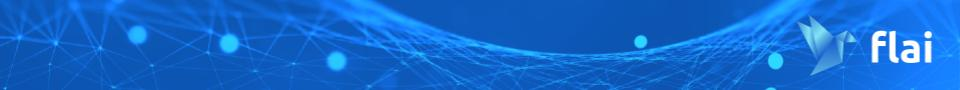

# **11ª Competição de MACHINE LEARNING FLAI**

## Descrição do Problema:
*O departamento de crédito de um banco deseja automatizar o processo de tomada de decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser feito.*

*Um empréstimo fiduciário é um tipo de empréstimo em que o tomador oferece como garantia algum bem, podendo ser um imóvel ou móveis, como veículos, equipamentos ou aplicações financeiras. Se o tomador não pagar o empréstimo, o credor pode tomar posse dos bens dados em garantia. É um tipo de empréstimo comum em instituições financeiras e pode ter taxas de juros mais baixas devido à garantia fornecida.*

*No dicionário de dados, algumas variáveis citam linhas de crédito, considere que elas são todo tipo de canal de acesso à crédito. Por exemplo: cartões de crédito, empréstimos pessoais, hipotecas, financiamentos de veículos etc.*

# Dicionário de Variáveis:
- **Cliente** [Variável Resposta]: bom pagador é aquele que pagou a sua dívida corretamente, mau
pagador é aquele que não pagou ou teve atrasos muito grandes em seu pagamento.
- **Empréstimo**: Valor emprestado ao cliente.
- **ValorDoBem**: Valor do bem que o cliente está colocando como garantia (em geral, são imóveis).
- **Finalidade**: Motivo pelo qual o empréstimo está sendo tomado.
- **Emprego**: Tipo de emprego do cliente.
- **TempoEmprego**: Tempo em anos que o cliente tem no seu emprego atual.
- **Negativos**: Número de prerrogativas negativas do cliente (por exemplo, pendências com IPTU, IPVA, conta de luz, cartão de crédito, etc).
- **Atrasos**: Número de linhas de crédito que o cliente já entrou em atraso.
- **TempoCliente**: Tempo do cliente na instituição (em meses).
- **LC-Recente**: Número de linhas de crédito recentes (adquiridas nos últimos 2 anos).
- **LC-Atual**: Número de linhas de crédito atuais
- **RDS**: Relação Débito/Salário - A porcentagem do salário anual do cliente comprometida em débitos.


In [1]:
# !pip install -U --pre pycaret
# !pip install pycaret[full]
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

---
## **Importação dos DADOS:**

In [2]:

import pandas as pd

df_total_treino = pd.read_csv('dados/treino.csv')
df_total_teste = pd.read_csv('dados/teste.csv')

df_total_treino_backup = df_total_treino.copy()
df_total_teste_backup = df_total_teste.copy()

In [3]:
coluna_resposta = df_total_treino['Cliente'].map({'mau pagador': 1, 'bom pagador': 0}) 
df_total_treino = df_total_treino.drop('Cliente', axis = 1)

In [4]:
df_total_treino

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,19468.0,309447.00,Reforma,Outros,0.50,0.0,1.0,185.6,0.0,33.0,39.2%
1,91688.0,449020.00,Diversas,Outros,15.25,0.0,0.0,234.5,1.0,41.0,NaN
2,34226.0,164394.70,Reforma,Outros,1.25,0.0,0.0,250.5,0.0,10.0,37.2%
3,48356.0,270592.64,Diversas,Outros,2.25,1.0,0.0,230.4,3.0,26.0,29.0%
4,64684.0,78167.16,Diversas,Professional,3.75,0.0,0.0,93.6,0.0,18.0,21.0%
...,...,...,...,...,...,...,...,...,...,...,...
3295,109586.0,547951.98,Diversas,Professional,17.75,0.0,0.0,112.7,1.0,17.0,29.7%
3296,161396.0,250917.40,Reforma,Autônomo,13.50,1.0,0.0,171.9,0.0,20.0,25.3%
3297,106760.0,531818.66,Diversas,Professional,15.00,0.0,0.0,113.7,0.0,17.0,27.0%
3298,78500.0,525950.00,Reforma,Professional,14.75,2.0,4.0,200.3,2.0,27.0,NaN


In [5]:
df_total_teste

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,82582.0,342542.60,Diversas,Geral,8.00,0.0,0.0,407.7,0.0,43.0,41.3%
1,37680.0,233000.56,Diversas,Geral,6.00,0.0,0.0,100.3,2.0,14.0,25.5%
2,58404.0,218578.54,Reforma,Geral,2.75,0.0,0.0,133.1,0.0,17.0,34.7%
3,33284.0,255630.54,Reforma,Outros,15.75,0.0,0.0,239.8,1.0,35.0,36.7%
4,66882.0,315629.66,Diversas,Geral,7.00,NaN,0.0,101.4,1.0,18.0,34.0%
...,...,...,...,...,...,...,...,...,...,...,...
1695,39250.0,316549.68,Diversas,Professional,10.75,2.0,0.0,184.4,1.0,30.0,28.4%
1696,27632.0,124689.40,Reforma,Geral,0.75,0.0,0.0,106.9,1.0,30.0,36.3%
1697,43960.0,331904.28,Reforma,Professional,8.75,0.0,0.0,259.4,1.0,12.0,35.9%
1698,47100.0,459853.00,Diversas,Outros,18.00,0.0,1.0,258.2,1.0,28.0,NaN


# Separação dos dados para teste:
- O Dataset "df_total_treino" foi separado em dois dataset para treino e teste ("df_parcial_treino"e "df_parcial_teste"). Assim faremos duas validações em paralelo.
- A validação principal será efetuada no "df_total_treino" inteiro e avaliada pelo cross-validation do pycaret e a validação secundária será efetuada treinando no dataset "df_parcial_treino"e testando no dataset "df_parcial_teste" utilizando a função "predict()".
- Essa estratégia permite que comparemos o score F1 em dois experimentos distintos melhorando a percepção de over e underfitting ao verificar o grau de enviesamento do modelo.

In [6]:
from sklearn.model_selection import train_test_split

# Separando 25% dos dados para teste
df_parcial_treino, df_parcial_teste, coluna_resposta_treino,coluna_resposta_teste  =  \
    train_test_split(df_total_treino, coluna_resposta, test_size = 0.25, random_state = 3)

df_parcial_treino.reset_index(drop=True, inplace=True)
df_parcial_teste.reset_index(drop=True, inplace=True)

coluna_resposta_treino.reset_index(drop=True, inplace=True)
coluna_resposta_teste.reset_index(drop=True, inplace=True)

In [7]:
#Número de linhas e Colunas
df_total_treino.shape

(3300, 11)

In [8]:
df_parcial_treino.shape

(2475, 11)

In [9]:
df_parcial_teste.shape

(825, 11)

- Teremos então dois experimentos um chamaremos de "total" e o outro de "parcial"

In [10]:
#criando listas contendo os dataframes treino e teste.
lista_df_total = [df_total_treino, df_total_teste]
lista_df_parcial = [df_parcial_treino,df_parcial_teste]

# Variável "RDS" de String para float:
- Aqui removemos o sinal de % e convertemos para float.

In [11]:
for tabela in lista_df_total:
    tabela['RDS'] = tabela['RDS'].apply(lambda x: str(x)[:-1]  if str(x).endswith('%') else x)
    tabela['RDS'] = tabela['RDS'].astype('float')
    
for tabela in lista_df_parcial:
    tabela['RDS'] = tabela['RDS'].apply(lambda x: str(x)[:-1]  if str(x).endswith('%') else x)
    tabela['RDS'] = tabela['RDS'].astype('float')    

# Variáveis "Empréstimo" e "ValorDoBem" - Tratamento de Outlier:
- Utilizamos o intervalo interquartil para determinar um limite superior como outlier e substituir todos os valores acima 
dele por esse limite.
- O Outlier foi determinado apenas nos dados de treino e utilizado o mesmo valor encontrado também nos dados de teste na tentativa de evitar o leakage (vazamento de dados)

In [12]:

Q3 = df_total_treino['Empréstimo'].quantile(0.75)
Q1 = df_total_treino['Empréstimo'].quantile(0.25)
FIQ = Q3 - Q1 
outlier_Empréstimo_df_total_treino = Q3 + 1.5 * FIQ

Q3 = df_total_treino['ValorDoBem'].quantile(0.75)
Q1 = df_total_treino['ValorDoBem'].quantile(0.25)
FIQ = Q3 - Q1 
outlier_ValorDoBem_df_total_treino = Q3 + 1.5 * FIQ

Q3 = df_parcial_treino['Empréstimo'].quantile(0.75)
Q1 = df_parcial_treino['Empréstimo'].quantile(0.25)
FIQ = Q3 - Q1 
outlier_Empréstimo_df_parcial_treino = Q3 + 1.5 * FIQ

Q3 = df_parcial_treino['ValorDoBem'].quantile(0.75)
Q1 = df_parcial_treino['ValorDoBem'].quantile(0.25)
FIQ = Q3 - Q1 
outlier_ValorDoBem_df_parcial_treino = Q3 + 1.5 * FIQ

# encontrando valores acima do limite e substituindo pelo limite:
for tabela in lista_df_total:    
    tabela.loc[tabela['Empréstimo'] >= outlier_Empréstimo_df_total_treino, 'Empréstimo'] = outlier_Empréstimo_df_total_treino
    tabela.loc[tabela['ValorDoBem'] >= outlier_ValorDoBem_df_total_treino, 'ValorDoBem'] = outlier_ValorDoBem_df_total_treino

for tabela in lista_df_parcial: 
    tabela.loc[tabela['Empréstimo'] >= outlier_Empréstimo_df_parcial_treino, 'Empréstimo'] = outlier_Empréstimo_df_parcial_treino
    tabela.loc[tabela['ValorDoBem'] >= outlier_ValorDoBem_df_parcial_treino, 'ValorDoBem'] = outlier_ValorDoBem_df_parcial_treino

# Variável "RDS" - Valores Faltantes.
- Haviam muitos valores faltantes na variável RDS o que demandou um tratamento especial em seu preenchimento.

In [13]:
df_total_treino["RDS"].isnull().mean() # Quase 20% de dados nulos na variável "RDS"

0.19787878787878788

- Foi adotada a estratégia de tentar encontrar uma relação entre a variável "RDS" e outras variáveis afim de "prever" quais seriam os valores possíveis de "RDS" a partir dos valores de outras colunas da tabela.
- Utilizando o Random Forest Regressor concluiu-se que a variável com maior importância na predição da variável "RDS" seria a variável "TempoCliente".

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Criamos uma cópia do dataset principal para usarmos como dataset auxiliar
df_total_treino_auxiliar = df_total_treino.copy()

# pré-processamento básico para poder aplicar o random forest regressor
df_total_treino_auxiliar['Emprego'] = le.fit_transform(df_total_treino_auxiliar['Emprego'])# transformando categórica em número
df_total_treino_auxiliar['Finalidade'] = le.fit_transform(df_total_treino_auxiliar['Finalidade'])# transformando categórica em número

df_total_treino_auxiliar["TempoEmprego"].fillna(df_total_treino_auxiliar['TempoEmprego'].mean(), inplace=True) #preenchendo valores nulos       
df_total_treino_auxiliar["Negativos"].fillna(df_total_treino_auxiliar['Negativos'].mean(), inplace=True) #preenchendo valores nulos       
df_total_treino_auxiliar["Atrasos"].fillna(df_total_treino_auxiliar['Atrasos'].mean(), inplace=True) #preenchendo valores nulos

df_total_treino_auxiliar = df_total_treino_auxiliar.dropna(subset=["RDS"])# eliminanado as linhas com RDS nulo

df_total_treino_auxiliar

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,19468.0,309447.0000,1,4,0.50,0.0,1.0,185.6,0.0,33.0,39.2
2,34226.0,164394.7000,1,4,1.25,0.0,0.0,250.5,0.0,10.0,37.2
3,48356.0,270592.6400,0,4,2.25,1.0,0.0,230.4,3.0,26.0,29.0
4,64684.0,78167.1600,0,5,3.75,0.0,0.0,93.6,0.0,18.0,21.0
5,38622.0,333175.9800,1,4,19.50,0.0,0.0,121.9,3.0,24.0,26.8
...,...,...,...,...,...,...,...,...,...,...,...
3294,129211.0,627413.2125,0,5,4.75,1.0,1.0,163.0,2.0,30.0,41.6
3295,109586.0,547951.9800,0,5,17.75,0.0,0.0,112.7,1.0,17.0,29.7
3296,129211.0,250917.4000,1,0,13.50,1.0,0.0,171.9,0.0,20.0,25.3
3297,106760.0,531818.6600,0,5,15.00,0.0,0.0,113.7,0.0,17.0,27.0


In [15]:
#Separando a coluna RDS para usar como alvo da predição
coluna_resposta_rds = df_total_treino_auxiliar['RDS']
df_total_treino_auxiliar = df_total_treino_auxiliar.drop('RDS', axis = 1)
df_total_treino_auxiliar

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual
0,19468.0,309447.0000,1,4,0.50,0.0,1.0,185.6,0.0,33.0
2,34226.0,164394.7000,1,4,1.25,0.0,0.0,250.5,0.0,10.0
3,48356.0,270592.6400,0,4,2.25,1.0,0.0,230.4,3.0,26.0
4,64684.0,78167.1600,0,5,3.75,0.0,0.0,93.6,0.0,18.0
5,38622.0,333175.9800,1,4,19.50,0.0,0.0,121.9,3.0,24.0
...,...,...,...,...,...,...,...,...,...,...
3294,129211.0,627413.2125,0,5,4.75,1.0,1.0,163.0,2.0,30.0
3295,109586.0,547951.9800,0,5,17.75,0.0,0.0,112.7,1.0,17.0
3296,129211.0,250917.4000,1,0,13.50,1.0,0.0,171.9,0.0,20.0
3297,106760.0,531818.6600,0,5,15.00,0.0,0.0,113.7,0.0,17.0


In [16]:

#Aplicando o Random Forest Regressor e verificando as feature importances
robo_treinado_por_RF = RandomForestRegressor()
robo_treinado_por_RF.fit(df_total_treino_auxiliar, coluna_resposta_rds)

lista = list(zip(df_total_treino_auxiliar.columns,
                 robo_treinado_por_RF.feature_importances_))

pd.DataFrame(lista, columns = ['coluna', 'importancia']).sort_values(by='importancia')

,coluna,importancia
5,Negativos,0.017413
2,Finalidade,0.018518
8,LC-Recente,0.048026
6,Atrasos,0.061392
3,Emprego,0.093968
9,LC-Atual,0.125391
4,TempoEmprego,0.145107
1,ValorDoBem,0.146627
0,Empréstimo,0.150023
7,TempoCliente,0.193536


- Trabalhamos a coluna "TempoCliente" separando em 5 cluster de acordo com os bins determinados em "bins_tc"
- Para cada cluster, 'c1', 'c2', 'c3', 'c4' e 'c5', calculamos a média de RDS.
- Criamos um DICIONÁRIO contendo as médias para cada cluster.

In [17]:
bins_tc = [ 1, 150, 300,600,1000,1171]

# criado coluna com os cluster
df_total_treino['bins_tempocliente'] = pd.cut(df_total_treino['TempoCliente'], 
                                              bins_tc, labels=['c1', 'c2', 'c3', 'c4', 'c5'])
df_total_treino['bins_tempocliente']

0       c2
1       c2
2       c2
3       c2
4       c1
        ..
3295    c1
3296    c2
3297    c1
3298    c2
3299    c2
Name: bins_tempocliente, Length: 3300, dtype: category
Categories (5, object): ['c1' < 'c2' < 'c3' < 'c4' < 'c5']

In [18]:
#criado coluna com o cálculo das médias de RDS por cluster TempoCliente
df_total_treino['mean'] = df_total_treino.groupby('bins_tempocliente')['RDS'].transform(lambda x:x.mean()) 
df_total_treino['mean']

0       34.444619
1       34.444619
2       34.444619
3       34.444619
4       34.120140
          ...    
3295    34.120140
3296    34.444619
3297    34.120140
3298    34.444619
3299    34.444619
Name: mean, Length: 3300, dtype: float64

In [19]:
# criado o dicionário 
bins_tc_rds_means_dict_df_total_treino = df_total_treino[['bins_tempocliente','mean']] \
    .drop_duplicates() \
    .set_index('bins_tempocliente')['mean'] \
    .to_dict()

# deletado colunas auxiliares
df_total_treino.drop(['bins_tempocliente','mean'], axis = 1, inplace = True)

print('Dicionário de médias de RDS por TempoCliente no dataset total:')
bins_tc_rds_means_dict_df_total_treino

Dicionário de médias de RDS por TempoCliente no dataset total:


{'c2': 34.44461867426943,
 'c1': 34.12013958125623,
 'c3': 32.63155555555555,
 'c4': 21.006666666666668,
 'c5': 40.2}

In [20]:
# Criado o mesmo dicionário agora para o dataset parcial
df_parcial_treino['bins_tempocliente'] = pd.cut(df_parcial_treino['TempoCliente'], bins_tc, labels=['c1', 'c2', 'c3', 'c4', 'c5'])
df_parcial_treino['mean'] = df_parcial_treino.groupby('bins_tempocliente')['RDS'].transform(lambda x:x.mean()) 
bins_tc_rds_means_dict_df_parcial_treino = df_parcial_treino[['bins_tempocliente','mean']].drop_duplicates().set_index('bins_tempocliente')['mean'].to_dict()
df_parcial_treino.drop(['bins_tempocliente','mean'], axis = 1, inplace = True)

print('Dicionário de médias de RDS por TempoCliente no dataset parcial:')
bins_tc_rds_means_dict_df_parcial_treino


Dicionário de médias de RDS por TempoCliente no dataset parcial:


{'c2': 34.332313575525816,
 'c3': 32.867878787878794,
 'c1': 34.207752956636,
 'c5': 40.2,
 'c4': 20.86923076923077}

- Finalmente preenchemos os valores faltantes da variável RDS utlizando os dicionários gerados

In [21]:

for tabela in lista_df_total:
    
    tabela['bins_tempocliente'] = pd.cut(tabela['TempoCliente'], bins_tc, labels=['c1', 'c2', 'c3', 'c4', 'c5']) # criando os mesmos clusters
    tabela["RDS"].fillna(tabela['bins_tempocliente'].map(bins_tc_rds_means_dict_df_total_treino).astype('float'), inplace=True) # preenchendo os valores nulos consultando os dicionários   
    tabela = tabela.drop(['bins_tempocliente'], axis = 1, inplace = True)# dropando coluna auxiliar
    
for tabela in lista_df_parcial:
    
    tabela['bins_tempocliente'] = pd.cut(tabela['TempoCliente'], bins_tc, labels=['c1', 'c2', 'c3', 'c4', 'c5']) # criando os mesmos clusters
    tabela["RDS"].fillna(tabela['bins_tempocliente'].map(bins_tc_rds_means_dict_df_parcial_treino).astype('float'), inplace=True) # preenchendo os valores nulos consultando os dicionários  
    tabela = tabela.drop(['bins_tempocliente'], axis = 1, inplace = True)# dropando coluna auxiliar

# Variáveis "Negativos" e "Atrasos" - Valores Faltantes
- Preenchido com suas médias nos respectivos dataset de treino.

In [22]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer

negativosMean_df_total_treino = df_total_treino['Negativos'].mean()
atrasosMean_df_total_treino = df_total_treino['Atrasos']. mean()

for tabela in lista_df_total:
        
    tabela["Negativos"].fillna(negativosMean_df_total_treino, inplace=True) #preenchendo valores nulos
    tabela["Atrasos"].fillna(atrasosMean_df_total_treino, inplace=True) #preenchendo valores nulos
    

################################################################################################################    

negativosMean_df_parcial_treino = df_parcial_treino['Negativos'].mean()
atrasosMean_df_parcial_treino = df_parcial_treino['Atrasos'].mean()

for tabela in lista_df_parcial: 
    
    tabela["Negativos"].fillna(negativosMean_df_parcial_treino, inplace=True) #preenchendo valores nulos
    tabela["Atrasos"].fillna(atrasosMean_df_parcial_treino, inplace=True) #preenchendo valores nulos

# Variável "TempoEmprego" - Valores faltantes
- Os valores faltantes da variável TempoEmprego foram preenchidos utilizando regressão.
- As variável RDS não foi utilizada como preditora por possuir muitos dados faltantes que também foram preditos.

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

# Foi escolhido o Extra Trees Regressor para prever os dados TempoEmprego faltantes
estimador = ExtraTreesRegressor(random_state=0, n_jobs=-1)

# Variáveis utilizadas como preditoras da Tempoemprego
colunas_num = ['Empréstimo','ValorDoBem','TempoEmprego','TempoCliente','LC-Recente','LC-Atual','Atrasos','Negativos']

# Predizendo os TempoEmprego faltantes nos dataset do experimento "total" utilizando regressão
imputer_total = IterativeImputer(estimator=estimador, random_state=0)
imputer_total.fit(df_total_treino[colunas_num])# fitando
for tabela in lista_df_total:
    tabela[colunas_num] = imputer_total.transform(tabela[colunas_num])# preditando

# Predizendo os TempoEmprego faltantes nos dataset do experimento "parcial" utilizando regressão
imputer_parcial = IterativeImputer(estimator=estimador, random_state=0)
imputer_parcial.fit(df_parcial_treino[colunas_num])# fitando
for tabela in lista_df_parcial:
    tabela[colunas_num] = imputer_parcial.transform(tabela[colunas_num])# preditando

# Todos os dados faltantes foram preenchidos!

In [24]:
df_total_treino.isnull().sum()

Empréstimo      0
ValorDoBem      0
Finalidade      0
Emprego         0
TempoEmprego    0
Negativos       0
Atrasos         0
TempoCliente    0
LC-Recente      0
LC-Atual        0
RDS             0
dtype: int64

# Engenharia de variáveis.
- Criou-se nova coluna "devedor_nao_cronico" no intuito de aumentar o valor dos dados.
###### Seguiu-se a seguinte premissa:
- "Clientes antigos com poucas linha de crédito não são devedores crônicos."

In [25]:
for tabela in lista_df_total + lista_df_parcial:
    
    # Implementando a relação:
    # proporcional entre "devedor_nao_cronico" e "LC-Recente"
    # e desporporcional a "TempoCliente"
    tabela['devedor_nao_cronico'] = tabela.TempoCliente / (tabela['LC-Recente'] + 1)
    determinante_cronico = 4.1 # melhor valor encontrado
    tabela['devedor_nao_cronico'] = tabela['devedor_nao_cronico'] \
        .apply(lambda elemento: 'menos_cronico' if elemento > determinante_cronico else 'mais_cronico' ) 
    
df_total_treino['devedor_nao_cronico']   

0       menos_cronico
1       menos_cronico
2       menos_cronico
3       menos_cronico
4       menos_cronico
            ...      
3295    menos_cronico
3296    menos_cronico
3297    menos_cronico
3298    menos_cronico
3299    menos_cronico
Name: devedor_nao_cronico, Length: 3300, dtype: object

# Extraindo o nome das colunas numéricas

In [26]:
variaveis_numericas_total = df_total_treino.select_dtypes(include='number').columns
variaveis_numericas_parcial = df_parcial_treino.select_dtypes(include='number').columns

# Normalização de variáveis númericas

In [27]:
# Escolheu-se o robustscaler por lidar melhor com outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_total_treino[variaveis_numericas_total] = scaler.fit_transform(df_total_treino[variaveis_numericas_total])
df_total_teste[variaveis_numericas_total] = scaler.transform(df_total_teste[variaveis_numericas_total])

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_parcial_treino[variaveis_numericas_parcial] = scaler.fit_transform(df_parcial_treino[variaveis_numericas_parcial])
df_parcial_teste[variaveis_numericas_parcial] = scaler.transform(df_parcial_teste[variaveis_numericas_parcial])

# Extraindo o nome das colunas categóricas

In [28]:
variaveis_categoricas_total = list(set(df_total_treino.columns) - set(variaveis_numericas_total))
variaveis_categoricas_parcial = list(set(df_parcial_treino.columns) - set(variaveis_numericas_parcial))

# Dummificação de Variáveis Categóricas

In [29]:

from sklearn.preprocessing import OneHotEncoder
meu_encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

df_total_treino = df_total_treino.join(pd.DataFrame(meu_encoder.fit_transform(df_total_treino[variaveis_categoricas_total]), columns=meu_encoder.get_feature_names_out()))
df_total_treino.drop(variaveis_categoricas_total, axis = 1, inplace = True)

df_total_teste = df_total_teste.join(pd.DataFrame(meu_encoder.transform(df_total_teste[variaveis_categoricas_total]), columns=meu_encoder.get_feature_names_out()))
df_total_teste.drop(variaveis_categoricas_total, axis = 1, inplace = True)

from sklearn.preprocessing import OneHotEncoder
meu_encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

df_parcial_treino = df_parcial_treino.join(pd.DataFrame(meu_encoder.fit_transform(df_parcial_treino[variaveis_categoricas_parcial]), columns=meu_encoder.get_feature_names_out()))
df_parcial_treino.drop(variaveis_categoricas_parcial, axis = 1, inplace = True)

df_parcial_teste = df_parcial_teste.join(pd.DataFrame(meu_encoder.transform(df_parcial_teste[variaveis_categoricas_parcial]), columns=meu_encoder.get_feature_names_out()))
df_parcial_teste.drop(variaveis_categoricas_parcial, axis = 1, inplace = True)


# Balanceando os dados
- Utilizando o pacote SMOTE(Synthetic Minority Over-sampling Technique), para balancear os dados.

In [30]:
coluna_resposta.mean() # 18 % dos dados tem variável resposta classe 1 

0.18606060606060607

In [31]:
len(coluna_resposta[coluna_resposta==1])# quantidade de linhas, amostras de classe 1 ('mau pagador')

614

In [32]:
len(coluna_resposta[coluna_resposta==0])# quantidade de linhas, amostras de classe 0 ('bom pagador')

2686

In [33]:

from imblearn.over_sampling import SMOTE
sm_df = SMOTE(random_state=42)

df_total_treino, coluna_resposta = sm_df.fit_resample(df_total_treino, coluna_resposta)

from imblearn.over_sampling import SMOTE
sm_dados = SMOTE(random_state=42)

df_parcial_treino, coluna_resposta_treino = sm_dados.fit_resample(df_parcial_treino, coluna_resposta_treino)

- Agora, já balanceado, o dataset consta com 50 % de amostras classe 1 e 50% classe 0 

In [34]:
 coluna_resposta.mean() # média de valores 1 na variável resposta

0.5

In [35]:
len(coluna_resposta[coluna_resposta==1])# quantidade de classe 1 ('mau pagador')

2686

In [36]:
len(coluna_resposta[coluna_resposta==0])# quantidade de classe 0 ('bom pagador')

2686

# Geração e escolha dos melhores modelos
- Os modelos foram escolhidos utilizando a função compare_models()
- Foram escolhidos os dois modelos mais fortes e um modelo fraco para complementar o voting classifier na combinação de modelos utilizando a função blend_models() do Pycaret.
- Os modelos escolhidos foram: Extra Trees , XGBoost  e KNN Classifiers.

In [37]:
from pycaret.classification import *

setup_Teste = setup(data = df_parcial_treino,
                target = coluna_resposta_treino,
                normalize = True,
                session_id = 42, 
                fold= 10, 
                fold_strategy='stratifiedkfold',
                preprocess = True)

melhores = compare_models(n_select = 5, sort= 'f1')

,Description,Value
0,Session id,42
1,Target,Cliente
2,Target type,Binary
3,Original data shape,"(4064, 17)"
4,Transformed data shape,"(4064, 17)"
5,Transformed train set shape,"(2844, 17)"
6,Transformed test set shape,"(1220, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9761,0.9979,0.9712,0.9810,0.9759,0.9522,0.9525,0.4150
rf,Random Forest Classifier,0.9480,0.9904,0.9521,0.9449,0.9482,0.8959,0.8965,0.4530
xgboost,Extreme Gradient Boosting,0.9462,0.9891,0.9493,0.9436,0.9464,0.8924,0.8926,0.3950
lightgbm,Light Gradient Boosting Machine,0.9430,0.9883,0.9423,0.9441,0.9431,0.8861,0.8863,0.3350
catboost,CatBoost Classifier,0.9395,0.9882,0.9388,0.9406,0.9395,0.8790,0.8794,2.6900
knn,K Neighbors Classifier,0.9269,0.9774,0.9409,0.9154,0.9279,0.8537,0.8542,0.1980
gbc,Gradient Boosting Classifier,0.8984,0.9670,0.8881,0.9074,0.8972,0.7968,0.7977,0.4150
dt,Decision Tree Classifier,0.8643,0.8643,0.8741,0.8577,0.8656,0.7286,0.7291,0.2470
ada,Ada Boost Classifier,0.8551,0.9334,0.8319,0.8734,0.8517,0.7103,0.7117,0.3030
ridge,Ridge Classifier,0.7518,0.0000,0.7109,0.7747,0.7408,0.5035,0.5059,0.1960


# Experimento "Parcial"
- Verificou-se bom Score na base de teste em torno de 0,81 no F1 Score.
- O Score na base de treino acima de 0,97 de F1 não reflete a realidade.

In [38]:

et = create_model('et', random_state = 42)
xgboost = create_model('xgboost', random_state = 42)
knn = create_model('knn')

modelo_combinado_hard = blend_models(
                                     [
                                       et,
                                       xgboost,
                                       knn,
                                     ]
    , optimize='F1', method = 'hard')

########################################################################################################

# Realizando a predição no dataset de teste do experimento "parcial"
pred = predict_model(modelo_combinado_hard, df_parcial_teste) # 

coluna_resposta_previsao = pred['prediction_label']

from sklearn.metrics import accuracy_score
print('\nAcuracia no df_parcial_teste: ', accuracy_score(coluna_resposta_teste, coluna_resposta_previsao))

from sklearn.metrics import f1_score
print('\nF1 Score no df_parcial_teste: ', f1_score(coluna_resposta_teste, coluna_resposta_previsao))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9754,0.9980,0.9718,0.9787,0.9753,0.9509,0.9509
1,0.9789,0.9993,0.9789,0.9789,0.9789,0.9579,0.9579
2,0.9860,0.9988,0.9720,1.0000,0.9858,0.9719,0.9723
3,0.9825,0.9992,0.9930,0.9726,0.9827,0.9649,0.9651
4,0.9613,0.9967,0.9437,0.9781,0.9606,0.9225,0.9231
5,0.9613,0.9931,0.9437,0.9781,0.9606,0.9225,0.9231
6,0.9718,0.9983,0.9859,0.9589,0.9722,0.9437,0.9440
7,0.9965,1.0000,0.9930,1.0000,0.9965,0.9930,0.9930
8,0.9718,0.9974,0.9507,0.9926,0.9712,0.9437,0.9445


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9439,0.9889,0.9366,0.9500,0.9433,0.8877,0.8878
1,0.9368,0.9899,0.9437,0.9306,0.9371,0.8737,0.8738
2,0.9544,0.9903,0.9790,0.9333,0.9556,0.9088,0.9099
3,0.9544,0.9924,0.9580,0.9514,0.9547,0.9088,0.9088
4,0.9542,0.9918,0.9366,0.9708,0.9534,0.9085,0.9090
5,0.9366,0.9812,0.9437,0.9306,0.9371,0.8732,0.8733
6,0.9401,0.9873,0.9366,0.9433,0.9399,0.8803,0.8803
7,0.9542,0.9941,0.9507,0.9574,0.9541,0.9085,0.9085
8,0.9296,0.9845,0.9366,0.9236,0.9301,0.8592,0.8592


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9088,0.9673,0.9366,0.8867,0.9110,0.8176,0.8189
1,0.9439,0.9838,0.9437,0.9437,0.9437,0.8877,0.8877
2,0.9404,0.9836,0.9441,0.9375,0.9408,0.8807,0.8807
3,0.9298,0.9720,0.9510,0.9128,0.9315,0.8596,0.8604
4,0.9331,0.9739,0.9507,0.9184,0.9343,0.8662,0.8667
5,0.9014,0.9655,0.9225,0.8851,0.9034,0.8028,0.8035
6,0.9261,0.9766,0.9366,0.9172,0.9268,0.8521,0.8523
7,0.9331,0.9849,0.9507,0.9184,0.9343,0.8662,0.8667
8,0.9401,0.9851,0.9507,0.9310,0.9408,0.8803,0.8805


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.0000,0.9648,0.9648,0.9648,0.9298,0.9298
1,0.9719,0.0000,0.9718,0.9718,0.9718,0.9439,0.9439
2,0.9930,0.0000,0.9860,1.0000,0.9930,0.9860,0.9861
3,0.9825,0.0000,0.9930,0.9726,0.9827,0.9649,0.9651
4,0.9754,0.0000,0.9648,0.9856,0.9751,0.9507,0.9509
5,0.9648,0.0000,0.9577,0.9714,0.9645,0.9296,0.9297
6,0.9648,0.0000,0.9648,0.9648,0.9648,0.9296,0.9296
7,0.9894,0.0000,0.9859,0.9929,0.9894,0.9789,0.9789
8,0.9577,0.0000,0.9366,0.9779,0.9568,0.9155,0.9163



Acuracia no df_parcial_teste:  0.9345454545454546

F1 Score no df_parcial_teste:  0.8211920529801324


# Experimento "Total"
- Comparando os modelos agora em todo o dataset:

In [39]:
from pycaret.classification import *

setup = setup(data = df_total_treino,
                target = coluna_resposta,
                normalize = True,
                session_id = 42, 
                fold= 10, 
                fold_strategy='stratifiedkfold',
                preprocess = True
             )

melhores = compare_models(n_select = 5, sort= 'f1')

,Description,Value
0,Session id,42
1,Target,Cliente
2,Target type,Binary
3,Original data shape,"(5372, 17)"
4,Transformed data shape,"(5372, 17)"
5,Transformed train set shape,"(3760, 17)"
6,Transformed test set shape,"(1612, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9747,0.9975,0.9670,0.9823,0.9745,0.9495,0.9497,0.4480
rf,Random Forest Classifier,0.9481,0.9893,0.9489,0.9476,0.9481,0.8963,0.8965,0.4850
xgboost,Extreme Gradient Boosting,0.9465,0.9888,0.9378,0.9546,0.9461,0.8931,0.8933,0.3950
catboost,CatBoost Classifier,0.9436,0.9874,0.9378,0.9491,0.9433,0.8872,0.8875,3.0210
lightgbm,Light Gradient Boosting Machine,0.9423,0.9878,0.9383,0.9461,0.9421,0.8846,0.8847,0.3150
knn,K Neighbors Classifier,0.9324,0.9832,0.9303,0.9345,0.9323,0.8649,0.8651,0.2120
gbc,Gradient Boosting Classifier,0.8896,0.9600,0.8755,0.9014,0.8880,0.7793,0.7799,0.5080
dt,Decision Tree Classifier,0.8636,0.8636,0.8665,0.8620,0.8639,0.7271,0.7277,0.2280
ada,Ada Boost Classifier,0.8511,0.9311,0.8410,0.8587,0.8494,0.7021,0.7029,0.3110
lr,Logistic Regression,0.7396,0.8209,0.7074,0.7564,0.7308,0.4793,0.4805,0.2060


- Gerando os modelos finais treinados em todo o dataset.

In [40]:

et = create_model('et', random_state = 42)
xgboost = create_model('xgboost', random_state = 42)
knn = create_model('knn')

modelo_combinado_hard = blend_models(
                                     [
                                       et,
                                       xgboost,
                                       knn,
                                     ]
    , optimize='F1', method = 'hard')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9840,0.9995,0.9734,0.9946,0.9839,0.9681,0.9683
1,0.9734,0.9976,0.9574,0.9890,0.9730,0.9468,0.9473
2,0.9654,0.9972,0.9415,0.9888,0.9646,0.9309,0.9319
3,0.9707,0.9978,0.9681,0.9733,0.9707,0.9415,0.9415
4,0.9654,0.9941,0.9681,0.9630,0.9655,0.9309,0.9309
5,0.9787,0.9968,0.9787,0.9787,0.9787,0.9574,0.9574
6,0.9787,0.9987,0.9787,0.9787,0.9787,0.9574,0.9574
7,0.9734,0.9977,0.9628,0.9837,0.9731,0.9468,0.9470
8,0.9814,0.9986,0.9787,0.9840,0.9813,0.9628,0.9628


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9495,0.9933,0.9255,0.9721,0.9482,0.8989,0.9000
1,0.9521,0.9896,0.9468,0.9570,0.9519,0.9043,0.9043
2,0.9415,0.9863,0.9255,0.9560,0.9405,0.8830,0.8834
3,0.9521,0.9909,0.9468,0.9570,0.9519,0.9043,0.9043
4,0.9521,0.9853,0.9521,0.9521,0.9521,0.9043,0.9043
5,0.9255,0.9880,0.9202,0.9301,0.9251,0.8511,0.8511
6,0.9441,0.9868,0.9362,0.9514,0.9437,0.8883,0.8884
7,0.9468,0.9900,0.9468,0.9468,0.9468,0.8936,0.8936
8,0.9548,0.9920,0.9362,0.9724,0.9539,0.9096,0.9102


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9601,0.9925,0.9734,0.9482,0.9606,0.9202,0.9205
1,0.9415,0.9872,0.9362,0.9462,0.9412,0.8830,0.8830
2,0.9335,0.9828,0.9149,0.9503,0.9322,0.8670,0.8676
3,0.9176,0.9779,0.9362,0.9026,0.9191,0.8351,0.8357
4,0.9229,0.9787,0.9202,0.9251,0.9227,0.8457,0.8458
5,0.9255,0.9793,0.9309,0.9211,0.9259,0.8511,0.8511
6,0.9495,0.9913,0.9468,0.9519,0.9493,0.8989,0.8989
7,0.9176,0.9781,0.9202,0.9153,0.9178,0.8351,0.8351
8,0.9229,0.9799,0.9043,0.9392,0.9214,0.8457,0.8463


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9840,0.0000,0.9734,0.9946,0.9839,0.9681,0.9683
1,0.9761,0.0000,0.9574,0.9945,0.9756,0.9521,0.9528
2,0.9761,0.0000,0.9681,0.9838,0.9759,0.9521,0.9522
3,0.9601,0.0000,0.9574,0.9626,0.9600,0.9202,0.9202
4,0.9654,0.0000,0.9681,0.9630,0.9655,0.9309,0.9309
5,0.9707,0.0000,0.9734,0.9683,0.9708,0.9415,0.9415
6,0.9761,0.0000,0.9734,0.9786,0.9760,0.9521,0.9521
7,0.9681,0.0000,0.9628,0.9731,0.9679,0.9362,0.9362
8,0.9787,0.0000,0.9681,0.9891,0.9785,0.9574,0.9577


# Tunagem de Hyper Parâmetros
- Realizamos a tunagem com 500 iterações, processo demorado.
- Os modelos foram salvos em HD por segurança.

In [41]:
import time
import joblib

n_iter = 500

###############

inicio = time.time()

# tunando o modelo com 500 iterações e 10 kfold totalizando 5000 treinamentos (ExtraTreesClassifier)
et_tunado = tune_model(et, optimize = 'f1', n_iter = n_iter, early_stopping= True, early_stopping_max_iters=10)

#salvando o modelo no HD promovendo reusabilidade
joblib.dump(et_tunado, 'et_tunado_' + '_' + str(n_iter) + '_niter_' + str(time.time() - inicio))
print("\nFinalizado em:", time.time() - inicio, " segundos.")


###############

inicio = time.time()

# Tunando XGBoost
xgb_tunado = tune_model(xgboost, optimize = 'f1', n_iter = n_iter, early_stopping= True, early_stopping_max_iters=10)

joblib.dump(xgb_tunado, 'xgb_tunado' + '_' + str(n_iter) + '_niter_' + str(time.time() - inicio))
print("\nFinalizado em:", time.time() - inicio, " segundos.")

# ###############

inicio = time.time()

# Tunando Knn
knn_tunado = tune_model(knn, optimize = 'f1', n_iter = n_iter, early_stopping= True, early_stopping_max_iters=10)

joblib.dump(knn_tunado, 'knn_tunado' + '_' + str(n_iter) + '_niter_' + str(time.time() - inicio))
print("\nFinalizado em:", time.time() - inicio, " segundos.")

###############

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7447,0.8508,0.6223,0.8239,0.7091,0.4894,0.5047
1,0.6809,0.8276,0.5479,0.7464,0.6319,0.3617,0.3752
2,0.6862,0.7976,0.5585,0.7500,0.6402,0.3723,0.3851
3,0.7101,0.8246,0.5745,0.7883,0.6646,0.4202,0.4366
4,0.6941,0.7977,0.5904,0.7450,0.6588,0.3883,0.3969
5,0.6915,0.8174,0.5745,0.7500,0.6506,0.3830,0.3939
6,0.7074,0.8122,0.5957,0.7671,0.6707,0.4149,0.4257
7,0.6941,0.8178,0.5745,0.7552,0.6526,0.3883,0.3999
8,0.6755,0.8011,0.5532,0.7324,0.6303,0.3511,0.3621


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Finalizado em: 19.033660650253296  segundos.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7739,0.9392,0.9947,0.6900,0.8148,0.5479,0.6106
1,0.7606,0.9522,0.9894,0.6788,0.8052,0.5213,0.5862
2,0.7553,0.9280,0.9894,0.6739,0.8017,0.5106,0.5779
3,0.7287,0.9226,0.9947,0.6493,0.7857,0.4574,0.5402
4,0.7234,0.9346,0.9947,0.6448,0.7824,0.4468,0.5319
5,0.7447,0.9260,0.9894,0.6643,0.7949,0.4894,0.5611
6,0.7473,0.9397,1.0000,0.6643,0.7983,0.4947,0.5733
7,0.7447,0.9186,1.0000,0.6620,0.7966,0.4894,0.5692
8,0.7473,0.9431,1.0000,0.6643,0.7983,0.4947,0.5733


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Finalizado em: 11.565459489822388  segundos.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9840,0.9994,0.9681,1.0000,0.9838,0.9681,0.9686
1,0.9734,0.9915,0.9574,0.9890,0.9730,0.9468,0.9473
2,0.9574,0.9906,0.9202,0.9943,0.9558,0.9149,0.9174
3,0.9628,0.9868,0.9309,0.9943,0.9615,0.9255,0.9274
4,0.9548,0.9847,0.9202,0.9886,0.9532,0.9096,0.9118
5,0.9681,0.9896,0.9415,0.9944,0.9672,0.9362,0.9375
6,0.9787,0.9940,0.9681,0.9891,0.9785,0.9574,0.9577
7,0.9734,0.9933,0.9521,0.9944,0.9728,0.9468,0.9477
8,0.9628,0.9910,0.9362,0.9888,0.9617,0.9255,0.9268


Fitting 10 folds for each of 1 candidates, totalling 10 fits

Finalizado em: 11.834445238113403  segundos.


# Gerando o modelo combinado por Voting Classifier
- Foi utilizado a função blend_models do PyCaret
- O método Hard (número de votos) obteve melhor resultado nesta modelagem do que o Soft (Soma das Probabilidades)

In [42]:
modelo_combinado_hard_tunado = blend_models(
                                     [
                                       et_tunado,
                                       xgb_tunado,
                                       knn_tunado,
                                     ]
    , optimize='F1', method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,0.0000,0.9787,0.9946,0.9866,0.9734,0.9735
1,0.9867,0.0000,0.9787,0.9946,0.9866,0.9734,0.9735
2,0.9814,0.0000,0.9681,0.9945,0.9811,0.9628,0.9631
3,0.9707,0.0000,0.9628,0.9784,0.9705,0.9415,0.9416
4,0.9761,0.0000,0.9734,0.9786,0.9760,0.9521,0.9521
5,0.9787,0.0000,0.9787,0.9787,0.9787,0.9574,0.9574
6,0.9814,0.0000,0.9734,0.9892,0.9812,0.9628,0.9629
7,0.9840,0.0000,0.9787,0.9892,0.9840,0.9681,0.9681
8,0.9867,0.0000,0.9787,0.9946,0.9866,0.9734,0.9735


# Submissão da Coluna Resposta Predita

In [43]:
pred = predict_model(modelo_combinado_hard_tunado, df_total_teste) # aplicando o modelo  no dataframe de teste

coluna_resposta_previsao = pred['prediction_label'] # extraindo a coluna  de previsão gerada

submissao = pd.DataFrame()
submissao['Cliente'] = coluna_resposta_previsao
submissao['Cliente'] = submissao['Cliente'].map({1: 'mau pagador', 0: 'bom pagador'}) 

display(submissao)

nome_arquivo = 'submissao_09810_tunado_500iter_xgb_et,knn_hard_10k_SMOTE_'
# Salvando csv da submissão em disco
submissao.to_csv(nome_arquivo + '.csv', index = False)

,Cliente
0,bom pagador
1,bom pagador
2,bom pagador
3,bom pagador
4,bom pagador
...,...
1695,bom pagador
1696,bom pagador
1697,bom pagador
1698,mau pagador
